<a href="https://colab.research.google.com/github/Astruzo/contengency/blob/main/rocksat2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# kmeans code

Current Working Directory: /content


<ipython-input-7-e83651177e77>:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


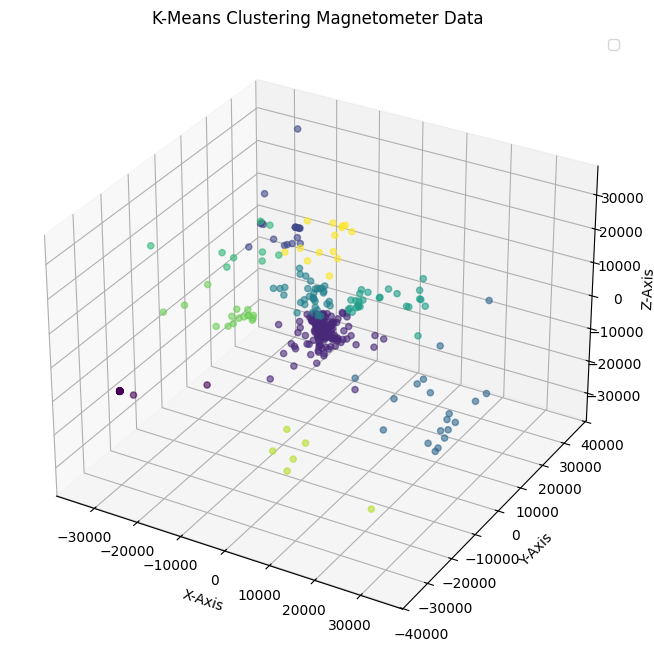

In [7]:
#imports/from
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import os

#File
print("Current Working Directory:", os.getcwd())
file=r"/content/drive/MyDrive/RockSat2025/rm3100_data.xlsx"

if not os.path.exists(file):
    raise FileNotFoundError(f"The file '{file}' was not found.")

#read
df=pd.read_excel(file, usecols=['Time', 'x', 'y', 'z'])

#Time stuff
if np.issubdtype(df['Time'].dtype, np.number):
    time_secs = (df['Time']*86400).astype(float)
else:
    time_secs = df['Time'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second).values

#columns
x = df['x'].values
y = df['y'].values
z = df['z'].values

data = np.column_stack((x, y, z, time_secs)).astype(np.float64)

#kmeans
kmeans=KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data)
labels=kmeans.labels_

#plot
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', alpha=0.6)

#labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
ax.set_label('Time-Axis')
ax.set_title('K-Means Clustering Magnetometer Data')
plt.legend()
plt.show()

#NN code

Current Working Directory: /content


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 207052256.0000 - mae: 7787.3081 - val_loss: 321258592.0000 - val_mae: 10820.0166
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 217601152.0000 - mae: 7929.9312 - val_loss: 321148992.0000 - val_mae: 10819.0488
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 202635072.0000 - mae: 7719.4507 - val_loss: 321040000.0000 - val_mae: 10818.3096
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 177731248.0000 - mae: 7077.4688 - val_loss: 320902336.0000 - val_mae: 10817.3174
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 211512992.0000 - mae: 7908.0635 - val_loss: 320721728.0000 - val_mae: 10815.8037
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 212863120.0000 - mae: 7906.8501 - val_loss: 320506912.0000 - val_mae: 10813.8174
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 221497920.0000 - mae: 8071.4634 - val_loss: 320301952.0000 - val_mae: 10811.6943
Epoch 8/50
34/34 ━━━━━━━━━

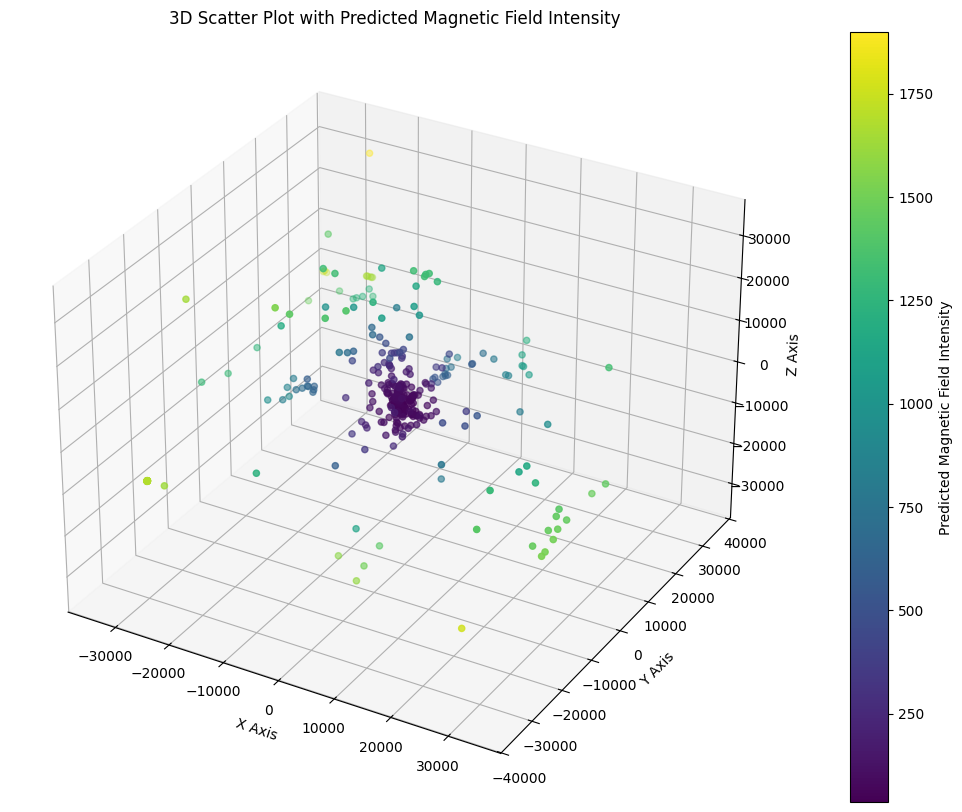

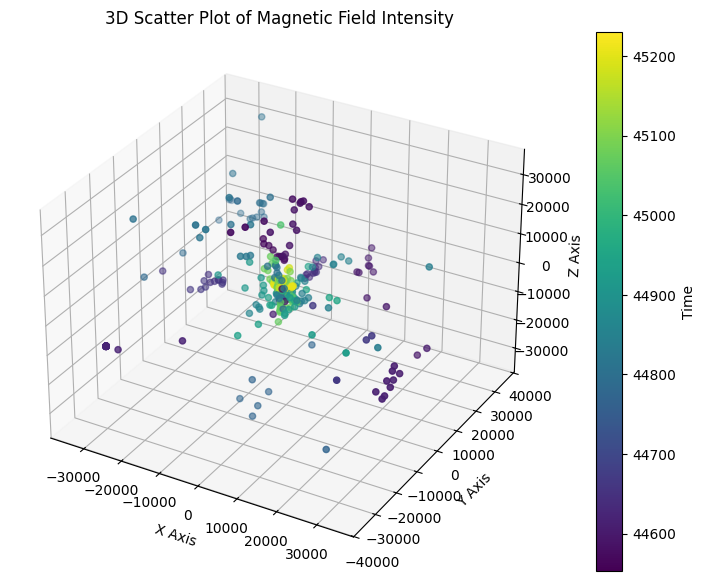

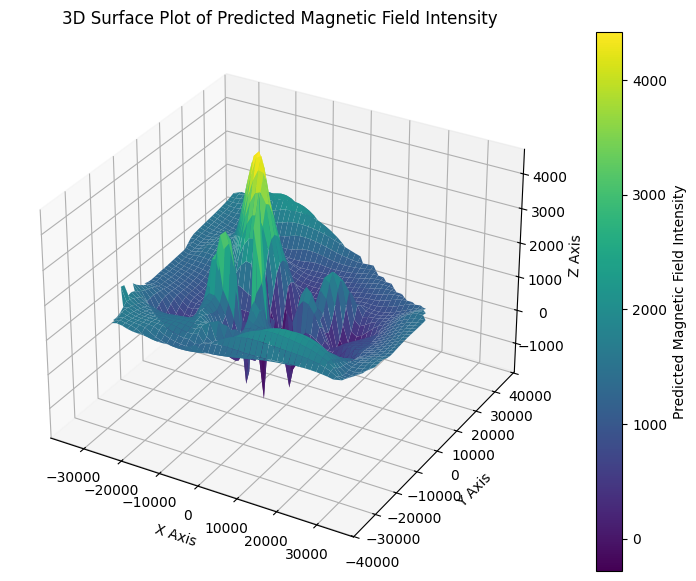

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from scipy.interpolate import griddata

#File reader
print("Current Working Directory:", os.getcwd())
file=r"/content/drive/MyDrive/RockSat2025/rm3100_data.xlsx"

if not os.path.exists(file):
    raise FileNotFoundError(f"The file '{file}' was not found.")

df=pd.read_excel(file, usecols=['Time', 'x', 'y', 'z']).dropna()

#Time code for colums
if np.issubdtype(df['Time'].dtype, np.number):
    time=(df['Time']*86400).astype(int)
else:
    time=df['Time'].apply(lambda t:t.hour*3600+t.minute*60+t.second).astype(int)

time=np.abs(time)

#Colums
B=np.sqrt(df['x']**2+df['y']**2+df['z']**2) #magnetic field intensity based on position

x=df['x'].values
y=df['y'].values
z=df['z'].values

data=np.column_stack((x, y, z)).astype(np.float64)
labels=B.values

#Data splitting for NN
X_train, X_test, y_train, y_test=train_test_split(data, labels, test_size=0.2, random_state=42)

#Define CNN model
def create_model():
    model=Sequential([
        Dense(64, activation='relu', input_shape=(3,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

#Training
model=create_model()
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

predictions=model.predict(data)

# 3D Scatter Plot Prediction
def plot_3d_data(x, y, z, predictions):
    fig = plt.figure(figsize=(18, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=predictions.flatten(), cmap='viridis', marker='o')
    cbar = fig.colorbar(scatter, ax=ax, label='Predicted Magnetic Field Intensity')
    cbar.ax.tick_params(labelsize=10)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("3D Scatter Plot with Predicted Magnetic Field Intensity")
    plt.show()

# Separate 3D Scatter Plot
def plot_3d_scatter(x, y, z, time):
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=time, cmap='viridis', marker='o')
    cbar = fig.colorbar(scatter, ax=ax, label='Time')
    cbar.ax.tick_params(labelsize=10)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("3D Scatter Plot of Magnetic Field Intensity")
    plt.show()

# 3D Surface Plot
def plot_3d_surface(x, y, z, predictions):
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    xi = np.linspace(min(x), max(x), 50)
    yi = np.linspace(min(y), max(y), 50)
    X_grid, Y_grid = np.meshgrid(xi, yi)
    Z_grid = griddata((x, y), predictions.flatten(), (X_grid, Y_grid), method='cubic')
    surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='none')
    cbar = fig.colorbar(surf, ax=ax, label='Predicted Magnetic Field Intensity')
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("3D Surface Plot of Predicted Magnetic Field Intensity")
    plt.show()

# Call functions to plot
plot_3d_data(x, y, z, predictions)
plot_3d_scatter(x, y, z, time)
plot_3d_surface(x, y, z, predictions)

#good looking code

In [ ]:
import pandas as pd
import os

#Print current directory and available files to confirm file locations
print("Current directory:", os.getcwd())
print("Existing files:", os.listdir())

#Load Data from Excel Files
try:
    temp_df = pd.read_excel('/content/drive/MyDrive/RockSat2025/temp_data_2024.xlsx', engine='openpyxl')
    mag_df = pd.read_excel('/content/drive/MyDrive/RockSat2025/rm3100_data.xlsx', engine='openpyxl')
except FileNotFoundError as e:
    print(f"File error: {e}")
    raise SystemExit("Ensure the Excel files are present in the working directory.")
except ImportError:
    raise SystemExit("Install required package: pip install openpyxl")

#Temperature Data Cleaning and Adjustment
#Rename the Celsius column and drop the Fahrenheit column if it is present
if 'Celsius' in temp_df.columns:
    temp_df = temp_df.rename(columns={'Celsius': 'Temp_C'})
if 'Fahrenheit' in temp_df.columns:
    temp_df = temp_df.drop(columns=['Fahrenheit'])

#Convert to numeric type and drop any rows with invalid values
temp_df['Temp_C'] = pd.to_numeric(temp_df['Temp_C'], errors='coerce')
temp_df = temp_df.dropna(subset=['Temp_C'])

#Adjust the temperature dataset to match the magnetometer dataset in row count.
#If temp_df has more rows than mag_df, truncate extra rows.
if len(temp_df) > len(mag_df):
    temp_df = temp_df.iloc[:len(mag_df)]

#Magnetometer Data Processing
#Convert the Date column from the format '250213' to a datetime object
mag_df['Date'] = pd.to_datetime(mag_df['Date'].astype(str), format='%d%m%y')

#Convert the Time column from the format '12:22:33' to a time object
#Changed from '%I:%M:%S %p' to '%H:%M:%S' to match 24-hour format
mag_df['Time'] = pd.to_datetime(mag_df['Time'], format='%H:%M:%S').dt.time

#Rest of the code remains the same
#Combine the Date and Time columns into a single datetime column
mag_df['datetime'] = mag_df.apply(lambda row: pd.Timestamp.combine(row['Date'].date(), row['Time']), axis=1)

#Drop the now-redundant Date and Time columns
mag_df = mag_df.drop(columns=['Date', 'Time'])

#Merging the Datasets
#Reset the indexes to ensure a proper row-wise merge
mag_df = mag_df.reset_index(drop=True)
temp_df = temp_df.reset_index(drop=True)

#Concatenate the dataframes so that each magnetometer reading gets its corresponding temperature
combined_df = pd.concat([mag_df, temp_df[['Temp_C']]], axis=1)

#Display Adjusted Datasets
print("Adjusted Temperature DataFrame:")
print(temp_df.head())
print("\nAdjusted Magnetometer DataFrame:")
print(mag_df.head())
print("\nCombined DataFrame:")
print(combined_df.head())

Current directory: /content
Existing files: ['.config', 'drive', 'sample_data']
Adjusted Temperature DataFrame:
   Temp_C
0   26.21
1   26.61
2   26.27
3   26.65
4   26.25

Adjusted Magnetometer DataFrame:
    x    y     z            datetime
0 -54 -557 -1052 2013-02-25 12:22:33
1 -50 -565 -1036 2013-02-25 12:22:34
2 -62 -557 -1053 2013-02-25 12:22:35
3 -49 -563 -1037 2013-02-25 12:22:36
4 -59 -559 -1053 2013-02-25 12:22:37

Combined DataFrame:
    x    y     z            datetime  Temp_C
0 -54 -557 -1052 2013-02-25 12:22:33   26.21
1 -50 -565 -1036 2013-02-25 12:22:34   26.61
2 -62 -557 -1053 2013-02-25 12:22:35   26.27
3 -49 -563 -1037 2013-02-25 12:22:36   26.65
4 -59 -559 -1053 2013-02-25 12:22:37   26.25
